# Web and Dictionnary bruteforce ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Web_and_Dict_model\\"
file_path = '.\Files\\Web_and_Dict\\'

## Preprocessing data for binary classification (Web or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [5]:
dict_3_classes = {}
dict_3_classes['BrowserHijacking'] = 'Web'
dict_3_classes['Backdoor_Malware'] = 'Web'
dict_3_classes['XSS'] = 'Web'
dict_3_classes['Uploading_Attack'] = 'Web'
dict_3_classes['SqlInjection'] = 'Web'
dict_3_classes['CommandInjection'] = 'Web'
dict_3_classes['DictionaryBruteForce'] = 'Web'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'

### Refactoring data

In [6]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [03:17<00:00,  1.18s/it]


### Counting number of samples per class

4


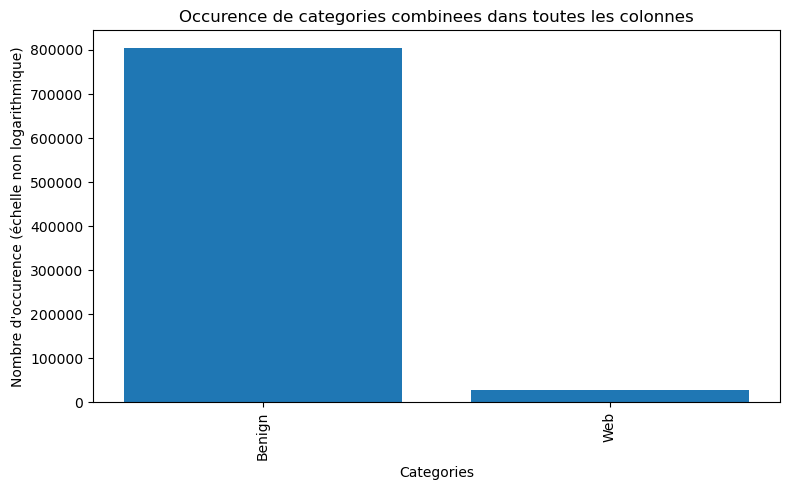

In [7]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes', 'Categories', 'Nombre d\'occurence', 8, 5, log_scale=False)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Web_and_Dict\\'
model_path_binary = '.\\Web_and_Dict_model\\Binary\\'
local_path = '.\\Web_and_Dict_model\\'
model_path_all_classes = '.\\Web_and_Dict_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

4
47


## First model (Binary (Web or Benigh))

### Building model

In [9]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [10]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

 56%|█████▌    | 5/9 [06:43<05:00, 75.13s/it]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 9/9 [31:59<00:00, 213.33s/it]


['.\\Web_and_Dict_model\\Binary\\encoder.joblib']

#### Complex models

In [6]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [7]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 3/3 [28:08<00:00, 562.93s/it]


['.\\Web_and_Dict_model\\Binary\\encoder.joblib']

#### Feature Importance

.\Web_and_Dict_model\Binary\model_DT.joblib
.\Web_and_Dict_model\Binary\model_RF.joblib
.\Web_and_Dict_model\Binary\model_ET.joblib
.\Web_and_Dict_model\Binary\model_XGB.joblib
.\Web_and_Dict_model\Binary\model_Cat.joblib
.\Web_and_Dict_model\Binary\model_LIGHT.joblib
.\Web_and_Dict_model\Binary\model_GBoost.joblib
.\Web_and_Dict_model\Binary\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 52.68it/s]


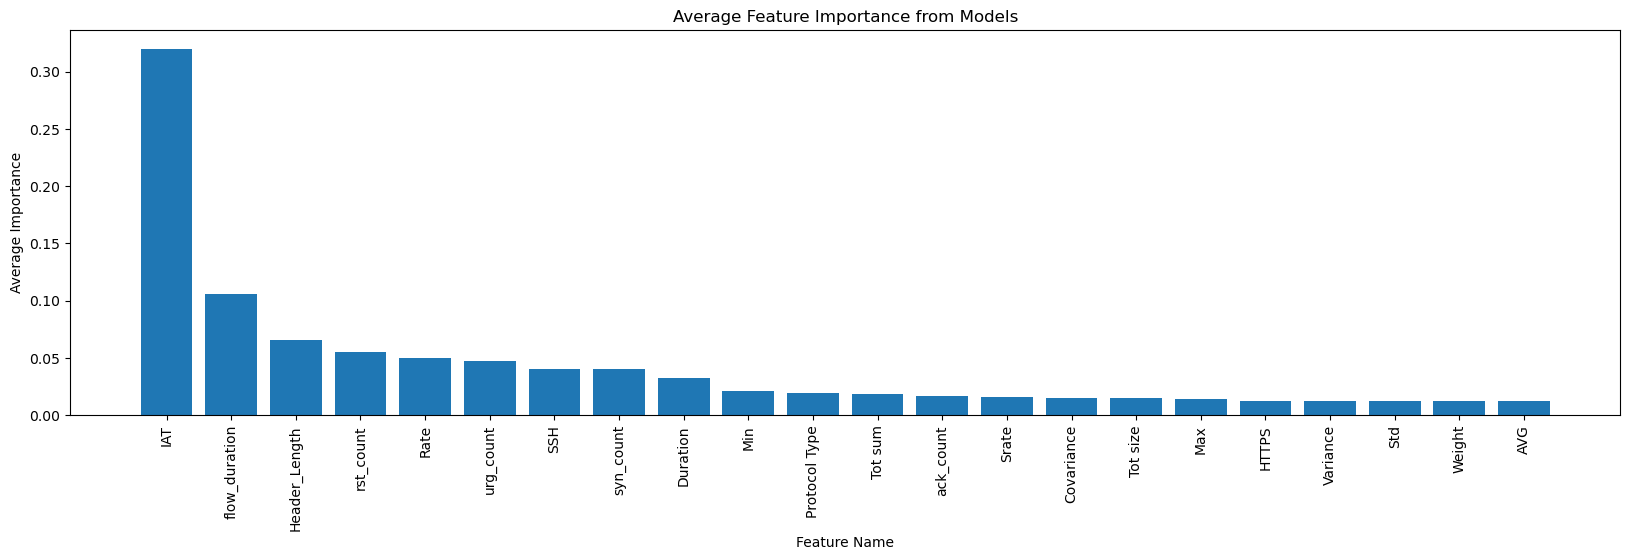

,Feature,Average Importance
39,IAT,0.320272
0,flow_duration,0.105685
1,Header_Length,0.065546
18,rst_count,0.055657
4,Rate,0.049562
17,urg_count,0.046952
24,SSH,0.040538
15,syn_count,0.040160
3,Duration,0.032133
34,Min,0.021117


In [11]:
# Import encoder and get all features
encoder = get_encoder(model_path_binary, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_binary)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Web_and_Dict\\Binary\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

#### Display performance

In [9]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [8]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(30)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
9,"Voting (Cat, XGB, RF)",0.996532,0.949226,0.997062,0.971847,0.990252,0.872200,0.971593,0.915627,0.001258,0.008490,379,2558,301293
10,Bagging (Cat),0.993805,0.914292,0.988647,0.948190,0.990136,0.873099,0.968395,0.914967,0.001440,0.008424,434,2538,301293
3,XGB,0.994411,0.925391,0.986860,0.953905,0.990043,0.878762,0.960537,0.915376,0.001928,0.008029,581,2419,301293
11,"Stacking (Cat, XGB, RF)",0.999190,0.992626,0.994831,0.993726,0.990030,0.880915,0.958065,0.915683,0.002091,0.007879,630,2374,301293
4,Cat,0.995319,0.935586,0.991316,0.961655,0.990010,0.882824,0.955782,0.915896,0.002244,0.007747,676,2334,301293
1,RF,0.999996,0.999944,0.999998,0.999971,0.988632,0.838489,0.981487,0.896677,0.000604,0.010764,182,3243,301293
5,LIGHT,0.990554,0.884412,0.963934,0.920175,0.988081,0.861479,0.944091,0.898236,0.002765,0.009154,833,2758,301293
6,GBoost,0.987308,0.824706,0.972209,0.883879,0.986731,0.815717,0.971139,0.877045,0.000999,0.012270,301,3697,301293
7,Adaboost,0.985428,0.822022,0.937522,0.870354,0.984968,0.810007,0.941219,0.863341,0.002430,0.012602,732,3797,301293
0,DT,1.000000,1.000000,1.000000,1.000000,0.983860,0.873932,0.875482,0.874705,0.007999,0.008142,2410,2453,301293


## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.963103,0.963103,0.962985,0.962626,11161,3.689697,302491


## Second model (All Web classes)

### Building model

In [13]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [10]:
filter_name = [
    {'name': 'Web', 'type': '='},
]
filter_cols = ['Binary']

In [15]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes, X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

100%|██████████| 9/9 [03:09<00:00, 21.05s/it]


['.\\Web_and_Dict_model\\All_classes\\encoder.joblib']

#### Complex models

In [9]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, LIGHT)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (XGB)",
        "Model": BaggingClassifier(base_estimator=XGBClassifier(random_state = 42), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, LIGHT, XGB)",
        "Model": StackingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('LIGHT', LGBMClassifier(random_state = 42, verbose = 0)),
            ],
            final_estimator=XGBClassifier(random_state = 42),
            cv=5)
    },
]

In [11]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(complexModelsDitionnary):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes + "complex_", X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

  0%|          | 0/3 [00:00<?, ?it/s]  File "c:\Users\mlcra\AppData\Local\Programs\Orange\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 3/3 [03:55<00:00, 78.56s/it]


['.\\Web_and_Dict_model\\All_classes\\encoder.joblib']

#### Feature Importance

.\Web_and_Dict_model\All_classes\model_DT.joblib
.\Web_and_Dict_model\All_classes\model_RF.joblib
.\Web_and_Dict_model\All_classes\model_ET.joblib
.\Web_and_Dict_model\All_classes\model_XGB.joblib
.\Web_and_Dict_model\All_classes\model_Cat.joblib
.\Web_and_Dict_model\All_classes\model_LIGHT.joblib
.\Web_and_Dict_model\All_classes\model_GBoost.joblib
.\Web_and_Dict_model\All_classes\model_Adaboost.joblib


100%|██████████| 8/8 [00:00<00:00, 100.78it/s]


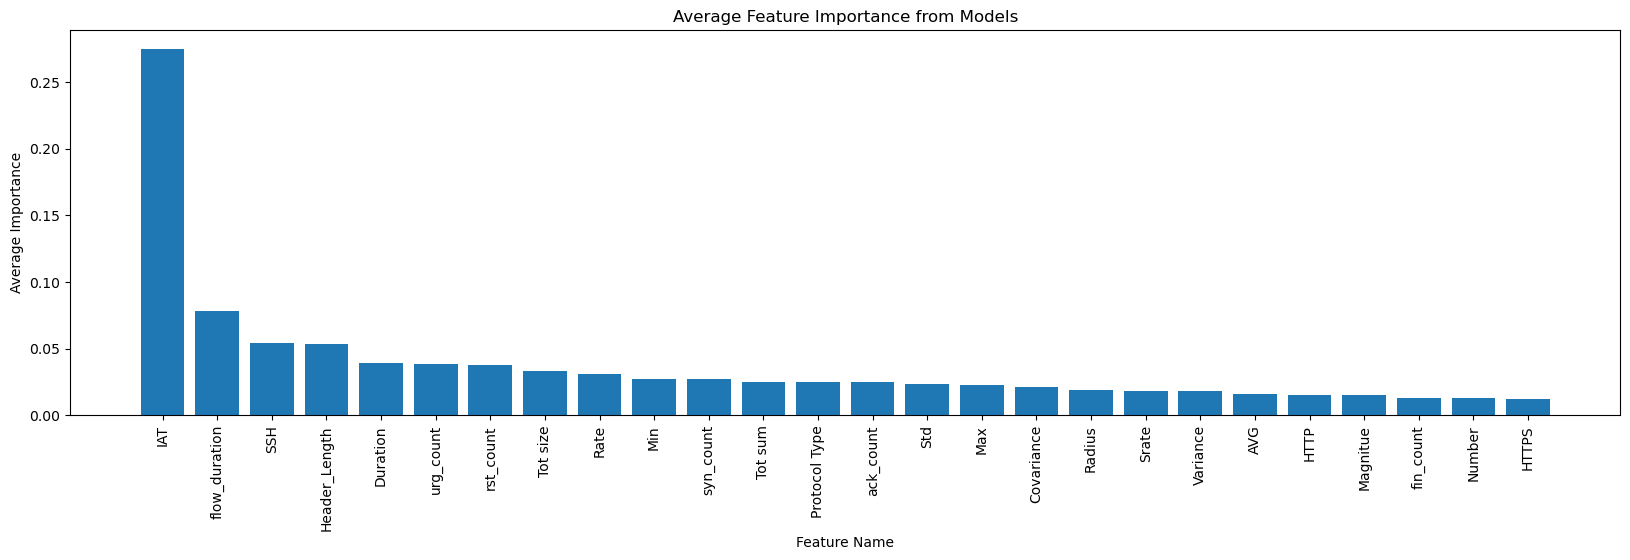

,Feature,Average Importance
39,IAT,0.275302
0,flow_duration,0.078211
24,SSH,0.054293
1,Header_Length,0.053503
3,Duration,0.039309
17,urg_count,0.038625
18,rst_count,0.038054
38,Tot size,0.033532
4,Rate,0.031053
34,Min,0.027312


In [16]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Web_and_Dict\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [15]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(0).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [12]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
9,"Voting (Cat, XGB, LIGHT)",0.998368,0.998151,0.999095,0.998621,0.793916,0.722293,0.781600,0.746613,0.107068,0.099016,1077,996,10059
10,Bagging (XGB),0.993246,0.991220,0.995360,0.993274,0.791928,0.715761,0.794871,0.746524,0.110846,0.097226,1115,978,10059
3,XGB,0.999381,0.999258,0.999746,0.999502,0.787752,0.718957,0.768466,0.739795,0.109255,0.102992,1099,1036,10059
5,LIGHT,0.998874,0.998849,0.999380,0.999114,0.784869,0.714551,0.764363,0.735513,0.110150,0.104981,1108,1056,10059
4,Cat,0.968089,0.957050,0.976234,0.966280,0.784472,0.713644,0.767860,0.735976,0.111442,0.104086,1121,1047,10059
11,"Stacking (Cat, LIGHT, XGB)",0.906067,0.857379,0.886326,0.870115,0.778308,0.709812,0.755164,0.728483,0.112735,0.108957,1134,1096,10059
1,RF,1.000000,1.000000,1.000000,1.000000,0.765285,0.661502,0.755285,0.691348,0.126355,0.108361,1271,1090,10059
6,GBoost,0.839712,0.788421,0.876766,0.824602,0.764191,0.687934,0.783153,0.723544,0.123869,0.111940,1246,1126,10059
0,DT,1.000000,1.000000,1.000000,1.000000,0.732478,0.678592,0.679348,0.678920,0.136694,0.130828,1375,1316,10059
2,ET,1.000000,1.000000,1.000000,1.000000,0.668058,0.533464,0.603141,0.549786,0.162342,0.169599,1633,1706,10059


## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.88372,0.88372,0.847486,0.864784,8014,0.11628,68920


In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
